# 16장 실전 데이터 분석 프로젝트

## 16.1 데이터 분석 프로세스

## 16.2 데이터 획득, 처리, 시각화 심화

### 깃허브에서 파일 다운로드

**[16장: 533 ~ 534페이지]**

In [4]:
import requests

# 깃허브의 파일 URL
url = 'https://github.com/wikibook/python-for-data-analysis/raw/master/readme.txt'

# URL에 해당하는 파일을 내려받음
r = requests.get(url)

# 파일을 저장할 폴더와 파일명을 지정
file_name = 'C:/myPyCode/data/readme.txt'

# 내려받은 파일을 지정한 폴더에 저장
with open(file_name, 'wb') as f:
    f.write(r.content)

**[16장: 534페이지]**

In [5]:
import os

os.path.isfile(file_name) 

True

### 데이터에서 결측치 확인 및 처리

#### 결측치 확인

**[16장: 535페이지]**

In [6]:
!type C:\myPyCode\data\missing_data_test.csv

연도,제품1,제품2,제품3,제품4
2015,250,150,,
2016,200,160,170,
2017,150,200,100,150
2018,120,230,130,170
2019,,250,140,


**[16장: 535페이지]**

In [7]:
import pandas as pd

data_file = "C:/myPyCode/data/missing_data_test.csv"

df = pd.read_csv(data_file, encoding = "cp949", index_col = "연도")

df

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,NaN,250,140.0,NaN


**[16장: 535페이지]**

In [9]:
df.isnull()

,제품1,제품2,제품3,제품4
연도,,,,
2015,False,False,True,True
2016,False,False,False,True
2017,False,False,False,False
2018,False,False,False,False
2019,True,False,False,True


**[16장: 536페이지]**

In [10]:
df.isnull().sum()

제품1    1
제품2    0
제품3    1
제품4    3
dtype: int64

#### 결측치 처리

**[16장: 537페이지]**

In [11]:
df.drop(index=[2019])

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0


**[16장: 537페이지]**

In [12]:
df.drop(columns=['제품3', '제품4'])

,제품1,제품2
연도,,
2015,250.0,150
2016,200.0,160
2017,150.0,200
2018,120.0,230
2019,NaN,250


**[16장: 538페이지]** 

In [19]:
df.drop(index=[2018, 2019], columns=['제품3', '제품4'])

,제품1,제품2
연도,,
2015,250.0,150
2016,200.0,160
2017,150.0,200


**[16장: 538페이지]** 

In [22]:
df.dropna() #df.dropna(axis=0)도 결과는 같습니다.

,제품1,제품2,제품3,제품4
연도,,,,
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0


**[16장: 539페이지]** 

In [24]:
df.dropna(axis=0, subset=['제품1'])

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0


**[16장: 539페이지]** 

In [25]:
df.dropna(axis=1)

,제품2
연도,
2015,150
2016,160
2017,200
2018,230
2019,250


**[16장: 539페이지]** 

In [26]:
df.dropna(axis=1, subset=[2015])

,제품1,제품2
연도,,
2015,250.0,150
2016,200.0,160
2017,150.0,200
2018,120.0,230
2019,NaN,250


**[16장: 540페이지]** 

In [27]:
df.dropna(axis=1, subset=[2016, 2019])

,제품2,제품3
연도,,
2015,150,NaN
2016,160,170.0
2017,200,100.0
2018,230,130.0
2019,250,140.0


**[16장: 541페이지]**

In [525]:
df.fillna(0)

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,0.0,0.0
2016,200.0,160,170.0,0.0
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,0.0,250,140.0,0.0


**[16장: 541페이지]**

In [28]:
df.fillna(method='bfill')

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,170.0,150.0
2016,200.0,160,170.0,150.0
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,NaN,250,140.0,NaN


**[16장: 541페이지]**

In [29]:
df.fillna(method='ffill')

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,120.0,250,140.0,170.0


**[16장: 542페이지]**

In [30]:
values = {'제품1': 100,  '제품4': 400}
df.fillna(value=values)

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,400.0
2016,200.0,160,170.0,400.0
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,100.0,250,140.0,400.0


### 데이터의 요약 및 재구성

#### 데이터의 구조 살펴보기

**[16장: 543페이지]**

In [88]:
import pandas as pd

data_file = "C:/myPyCode/data/total_sales_data.csv"

df_sales = pd.read_csv(data_file)
df_sales

,매장명,제품종류,모델명,판매,재고
0,A,스마트폰,S1,1,2
1,A,스마트폰,S2,2,5
2,A,TV,V1,3,5
3,B,스마트폰,S2,4,6
4,B,스마트폰,S1,5,8
5,B,TV,V1,6,9
6,C,스마트폰,S2,2,4
7,C,TV,V1,3,6
8,C,TV,V2,7,9


**[16장: 543페이지]**

In [83]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
매장명     9 non-null object
제품종류    9 non-null object
모델명     9 non-null object
판매      9 non-null int64
재고      9 non-null int64
dtypes: int64(2), object(3)
memory usage: 440.0+ bytes


**[16장: 544페이지]**

In [84]:
df_sales['매장명'].value_counts()

A    3
C    3
B    3
Name: 매장명, dtype: int64

**[16장: 545페이지]**

In [85]:
df_sales['제품종류'].value_counts()

스마트폰    5
TV      4
Name: 제품종류, dtype: int64

#### 피벗 테이블로 데이터 재구성하기

**[16장: 546페이지]**

In [86]:
df_sales

,매장명,제품종류,모델명,판매,재고
0,A,스마트폰,S1,1,2
1,A,스마트폰,S2,2,5
2,A,TV,V1,3,5
3,B,스마트폰,S2,4,6
4,B,스마트폰,S1,5,8
5,B,TV,V1,6,9
6,C,스마트폰,S2,2,4
7,C,TV,V1,3,6
8,C,TV,V2,7,9


**[16장: 546페이지]**

In [87]:
df_sales.pivot_table(index=["매장명", "제품종류", "모델명"],
                     values =["판매","재고"], aggfunc='sum')

재고  판매
매장명 제품종류 모델명        
A   TV   V1    5   3
    스마트폰 S1    2   1
         S2    5   2
B   TV   V1    9   6
    스마트폰 S1    8   5
         S2    6   4
C   TV   V1    6   3
         V2    9   7
    스마트폰 S2    4   2

**[16장: 547페이지]**

In [40]:
df_sales.pivot_table(index=["매장명"], columns = ["제품종류"],
                     values =["판매","재고"], aggfunc='sum')

재고       판매     
제품종류  TV 스마트폰  TV 스마트폰
매장명                   
A      5    7   3    3
B      9   14   6    9
C     15    4  10    2

**[16장: 547페이지]**

In [41]:
df_sales.pivot_table(index=["매장명"], columns = ["제품종류"],
                     values =["판매","재고"], aggfunc='count')

재고      판매     
제품종류 TV 스마트폰 TV 스마트폰
매장명                 
A     1    2  1    2
B     1    2  1    2
C     2    1  2    1

### 워드 클라우드를 이용한 데이터 시각화

**[16장: 549~550페이지]**

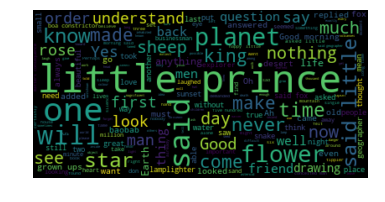

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

file_name = 'C:/myPyCode/data/littleprince_djvu.txt'

with open(file_name) as f: # 파일을 읽기 모드로 열기
    text = f.read() # 파일의 내용 읽어오기

# 워드 클라우드의 이미지를 생성합니다.
wordcloud_image = WordCloud().generate(text)

# 생성한 워드 클라우드 이미지를 화면에 표시합니다.
plt.imshow(wordcloud_image, interpolation='bilinear')
plt.axis("off")
plt.show()

**[16장: 550페이지]**

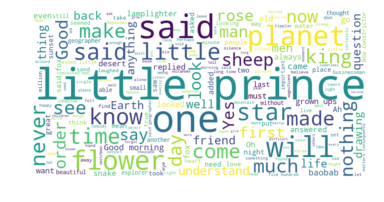

In [44]:
wordcloud_image = WordCloud(background_color='white', max_font_size=300, width=800, height=400).generate(text)

plt.imshow(wordcloud_image, interpolation="bilinear")
plt.axis("off")
plt.show()

**[16장: 551페이지]**

In [46]:
image_file_name = 'C:/myPyCode/figures/little_prince.png'

wordcloud_image.to_file(image_file_name)
plt.show()

**[16장: 551페이지]**

In [47]:
import pandas as pd

word_count_file = "C:/myPyCode/data/word_count.csv"
word_count = pd.read_csv(word_count_file, index_col = '단어')
word_count.head(5)

,빈도
단어,
산업혁명,1662
기술,1223
사업,1126
혁신,1084
경제,1000


**[16장: 552페이지]**

In [49]:
word_count['빈도'][0:5]

단어
산업혁명    1662
기술      1223
사업      1126
혁신      1084
경제      1000
Name: 빈도, dtype: int64

**[16장: 552페이지]**

In [50]:
type(word_count['빈도'])

pandas.core.series.Series

**[16장: 553페이지]**

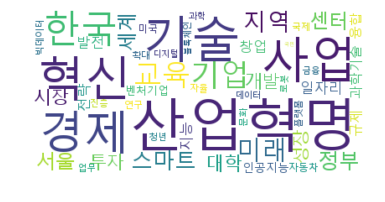

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

korean_font_path = 'C:/Windows/Fonts/malgun.ttf' # 한글 폰트(맑은 고딕) 파일명

# 워드 클라우드 이미지 생성
wc = WordCloud(font_path=korean_font_path, background_color='white')

frequencies = word_count['빈도'] # pandas의 Series 형식이 됨
wordcloud_image = wc.generate_from_frequencies(frequencies)

# 생성한 워드 클라우드 이미지를 화면에 표시
plt.imshow(wordcloud_image, interpolation="bilinear")
plt.axis("off")
plt.show()

## 16.3 실전 데이터(서울시 업무추진비) 분석

### 데이터 분석의 주제 선정

### 데이터 수집

**[16장: 557~558페이지]**

In [53]:
import requests
import os
import pathlib

#인자: 확장자, 연도, 내려받을 폴더
def get_seoul_expense_list(extension, year, data_folder): 

    # 깃허브의 데이터 위치 지정
    # ex) 'https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/'
    expense_list_year_url = 'https://github.com/seoul-opengov/opengov/raw/master/expense_list' + str(year) + '/'

    # 데이터를 내려받을 폴더 지정
    # ex) 'C:/myPyCode/data/seoul_expense/2016/'
    expense_list_year_dir = data_folder + str(year) + '/'
    
    # 내려받을 폴더가 없다면 폴더 생성
    if(os.path.isdir(expense_list_year_dir)):
        print("데이터 폴더({0})가 이미 있습니다. {0}년 데이터의 다운로드를 시작합니다.".format(year))
    else:
        print("데이터 폴더({0})가 없어서 생성했습니다. {0}년 데이터의 다운로드를 시작합니다.".format(year))
        # 폴더 생성
        pathlib.Path(expense_list_year_dir).mkdir(parents=True, exist_ok=True) 
        
    # 지정한 폴더로 1월 ~ 12월 업무추진비 파일을 다운로드
    for k in range(12):
        file_name = '{0}{1:02d}_expense_list.{2}'.format(year, k+1, extension)    
        url = expense_list_year_url + file_name
        print(url)
        r = requests.get(url)
        with open(expense_list_year_dir + file_name, 'wb') as f:
            f.write(r.content)

**[16장: 558~559페이지]**

In [54]:
# 내려받을 업무추진비 데이터의 파일 형식을 지정
extension = "csv" 

# 내려받을 업무추진비 데이터의 연도를 지정
year = 2016 

# 내려받을 업무추진비 데이터의 폴더를 지정
data_folder = 'C:/myPyCode/data/seoul_expense/' 

# 함수를 실행
get_seoul_expense_list(extension, year, data_folder)

데이터 폴더(2016)가 없어서 생성했습니다. 2016년 데이터의 다운로드를 시작합니다.
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201601_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201602_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201603_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201604_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201605_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201606_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201607_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201608_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201609_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201610_expense_list.csv
https://github.com/s

**[16장: 559~560페이지]**

In [60]:
import glob

path_name = 'C:/myPyCode/data/seoul_expense/2016/' # 폴더 이름

# 지정 폴더에서 파일명에 list.csv가 포함된 파일만 지정
file_name_for_glob = path_name + "*list.csv" 

csv_files = []
for csv_file in glob.glob(file_name_for_glob): 
    # 반환값에서 폴더는 제거하고 파일 이름만 추출
    csv_files.append(csv_file.split("\\")[-1]) 

print("[폴더 이름]", path_name) # 폴더명 출력
print("* CSV 파일:", csv_files)

[폴더 이름] C:/myPyCode/data/seoul_expense/2016/
* CSV 파일: ['201601_expense_list.csv', '201602_expense_list.csv', '201603_expense_list.csv', '201604_expense_list.csv', '201605_expense_list.csv', '201606_expense_list.csv', '201607_expense_list.csv', '201608_expense_list.csv', '201609_expense_list.csv', '201610_expense_list.csv', '201611_expense_list.csv', '201612_expense_list.csv']


**[16장: 560페이지]**

In [61]:
data_folder = 'C:/myPyCode/data/seoul_expense/'

years = [2016, 2017, 2018] # 다운로드받을 연도를 지정

extension = "csv"
# extension = "xlsx"
# extension = "xml"

for year in years:
    get_seoul_expense_list(extension, year, data_folder)

print("모든 데이터를 다운로드 받았습니다.")

데이터 폴더(2016)가 이미 있습니다. 2016년 데이터의 다운로드를 시작합니다.
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201601_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201602_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201603_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201604_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201605_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201606_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201607_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201608_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201609_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2016/201610_expense_list.csv
https://github.com/seou

**[16장: 561페이지]**

In [95]:
import glob

data_folder = 'C:/myPyCode/data/seoul_expense/'

years = [2016, 2017, 2018] # 다운로드받을 연도를 지정

for year in years:
    path_name = data_folder + str(year) + "/" # 연도별 폴더명을 지정
    
    # 지정 폴더에서 파일명에 list.csv가 포함된 파일만 지정
    file_name_for_glob = path_name + "*list.csv"
    
    csv_files = []
    for csv_file in glob.glob(file_name_for_glob): 
        # 반환값에서 폴더는 제거하고 파일명만 추출
        csv_files.append(csv_file.split("\\")[-1]) 

    print("[폴더 이름]", path_name) # 폴더명 출력
    print("* CSV 파일:", csv_files)

[폴더 이름] C:/myPyCode/data/seoul_expense/2016/
* CSV 파일: ['201601_expense_list.csv', '201602_expense_list.csv', '201603_expense_list.csv', '201604_expense_list.csv', '201605_expense_list.csv', '201606_expense_list.csv', '201607_expense_list.csv', '201608_expense_list.csv', '201609_expense_list.csv', '201610_expense_list.csv', '201611_expense_list.csv', '201612_expense_list.csv']
[폴더 이름] C:/myPyCode/data/seoul_expense/2017/
* CSV 파일: ['201701_expense_list.csv', '201702_expense_list.csv', '201703_expense_list.csv', '201704_expense_list.csv', '201705_expense_list.csv', '201706_expense_list.csv', '201707_expense_list.csv', '201708_expense_list.csv', '201709_expense_list.csv', '201710_expense_list.csv', '201711_expense_list.csv', '201712_expense_list.csv']
[폴더 이름] C:/myPyCode/data/seoul_expense/2018/
* CSV 파일: ['201801_expense_list.csv', '201802_expense_list.csv', '201803_expense_list.csv', '201804_expense_list.csv', '201805_expense_list.csv', '201806_expense_list.csv', '201807_expense_list.c

### 데이터 처리

#### 수집된 데이터 파일의 구조 분석

**[16장: 562페이지]**

In [3]:
data_file = 'C:/myPyCode/data/seoul_expense/2016/201601_expense_list.csv'

with open(data_file, encoding='utf-8') as f:
    line1 = f.readline()
    line2 = f.readline()
    line3 = f.readline()

    print(line1)
    print(line2)
    print(line3)

﻿nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,exec_yr,exec_month,expense_budget,expense_execution,category,exec_dt,exec_loc,target_nm,payment_method,exec_amount

7832320,"2016년 1월 서울특별시장 업무추진비 집행내역 공표",http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,,,,2016,1,380200000,13551000,"시정 관련 간담회 등","행정국 총무과","2016-01-30 12:27","매일한우타운식당(광시면 예당로길)","시정 청년정책 관련 업무협의 간담회","시장 등 12명",카드,250000

7832320,"2016년 1월 서울특별시장 업무추진비 집행내역 공표",http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,,,,2016,1,380200000,13551000,"시정 관련 간담회 등","행정국 총무과","2016-01-30 08:28","청암회관(예산군 덕산면)","시정 충남, 전북 현장 방문 관련 업무협의","시장 등 6명",카드,72000



**[16장: 563페이지]**

In [4]:
line1_len = len(line1.split(','))
line2_len = len(line2.split(','))
line3_len = len(line3.split(','))

print("[각 줄의 데이터값의 개수]")
print("첫째 줄:{}, 둘째 줄:{}, 셋째 줄:{}".format(line1_len, line2_len, line3_len))

[각 줄의 데이터값의 개수]
첫째 줄:18, 둘째 줄:20, 셋째 줄:21


**[16장: 563페이지]**

In [6]:
def get_value_count(line):
    
    line_rep_list = []
    for k, x in enumerate(line.split('"')):
        if(k % 2 != 0):
            x = x.replace(',', '')
        line_rep_list.append(x)
        
    line_rep_str = ''.join(line_rep_list) 
           
    return len(line_rep_str.split(','))

**[16장: 564페이지]**

In [7]:
line1_len = get_value_count(line1)
line2_len = get_value_count(line2)
line3_len = get_value_count(line3)

print("[각 줄의 데이터값의 개수]")
print("첫째 줄:{}, 둘째 줄:{}, 셋째 줄:{}".format(line1_len, line2_len, line3_len))

[각 줄의 데이터값의 개수]
첫째 줄:18, 둘째 줄:20, 셋째 줄:20


#### 첫 번째 줄의 열 이름과 개수 변경

**[16장: 565페이지]**

In [8]:
def change_csv_file_first_line_value(old_file_name, new_file_name):
    with open(old_file_name, encoding='utf-8') as f:  # 파일을 읽기 모드로 열기
        # 전체 데이터를 읽어서 한 줄씩 lines 리스트의 각 요소에 할당
        lines = f.read().splitlines()
    
    # 첫째 줄의 내용을 변경할 열 이름을 지정해서 변경
    lines[0] = 'nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,\
집행연도,집행월,예산,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액'
    
    with open(new_file_name, 'w', encoding='utf-8') as f:  # 파일을 쓰기 모드로 열기
        # 리스트 내의 각 요소를 개행문자(\n)로 연결해서 파일로 저장
        f.write('\n'.join(lines))

**[16장: 565페이지]**

In [9]:
# 기존의 파일
old_file_name = 'C:/myPyCode/data/seoul_expense/2016/201601_expense_list.csv'

# 새로운 파일
new_file_name = 'C:/myPyCode/data/seoul_expense/2016/201601_expense_list_new.csv' 

# 첫째 줄의 내용을 변경한 새로운 파일 생성
change_csv_file_first_line_value(old_file_name, new_file_name)

**[16장: 565페이지]**

In [10]:
with open(new_file_name, encoding='utf-8') as f:  # 파일을 읽기 모드로 열기
    for k in range(3):
        print(f.readline())

nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행연도,집행월,예산,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액

7832320,"2016년 1월 서울특별시장 업무추진비 집행내역 공표",http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,,,,2016,1,380200000,13551000,"시정 관련 간담회 등","행정국 총무과","2016-01-30 12:27","매일한우타운식당(광시면 예당로길)","시정 청년정책 관련 업무협의 간담회","시장 등 12명",카드,250000

7832320,"2016년 1월 서울특별시장 업무추진비 집행내역 공표",http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,,,,2016,1,380200000,13551000,"시정 관련 간담회 등","행정국 총무과","2016-01-30 08:28","청암회관(예산군 덕산면)","시정 충남, 전북 현장 방문 관련 업무협의","시장 등 6명",카드,72000



**[16장: 566페이지]**

In [11]:
# 인자: 연도, 데이터 파일이 있는 폴더
def change_year_csv_file_first_line_value(year, data_folder): 

    # 데이터 파일이 있는 폴더 지정
    # ex) 'C:/myPyCode/data/seoul_expense/2016/'
    expense_list_year_dir = data_folder + str(year) + '/'
    
    extension = 'csv' # 확장자 이름
    
    # 지정한 폴더에 있는 월별 업무추진비 파일에서 첫 번째 줄의 열 이름을 변경 
    for k in range(12):
        # 기존의 파일 이름 지정
        old_file_name = expense_list_year_dir + '{0}{1:02d}_expense_list.{2}'.format(year, k+1, extension) 
        
        # 새로운 파일 이름 지정
        new_file_name = expense_list_year_dir + '{0}{1:02d}_expense_list_new.{2}'.format(year, k+1, extension) 
  
        # 첫째 줄의 내용을 변경한 새로운 파일 생성
        change_csv_file_first_line_value(old_file_name, new_file_name)

**[16장: 566 ~ 567페이지]**

In [12]:
data_folder = 'C:/myPyCode/data/seoul_expense/'

years = [2016, 2017, 2018] # 연도를 지정

for year in years:
    print("{}년 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일에 저장합니다.".format(year))
    change_year_csv_file_first_line_value(year, data_folder)

print("모든 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일로 저장했습니다.")

2016년 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일에 저장합니다.
2017년 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일에 저장합니다.
2018년 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일에 저장합니다.
모든 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일로 저장했습니다.


**[16장: 567페이지]**

In [15]:
import glob

data_folder = 'C:/myPyCode/data/seoul_expense/'

years = [2016, 2017, 2018] # 연도를 지정

for year in years:
    path_name = data_folder + str(year) # 폴더명을 지정
    print("[폴더 이름]", path_name) # 폴더명 출력

    new_csv_files = []
    
    # 지정 폴더에서 파일명에 _new.csv가 포함된 파일만 지정
    file_name_for_glob = path_name + "/*_new.csv" 
    
    for new_csv_file in glob.glob(file_name_for_glob): 
        # 반환값에서 폴더는 제거하고 파일 이름만 추출
        new_csv_files.append(new_csv_file.split("\\")[-1]) 
    
    print("* 새롭게 생성된 CSV 파일:", new_csv_files)

[폴더 이름] C:/myPyCode/data/seoul_expense/2016
* 새롭게 생성된 CSV 파일: ['201601_expense_list_new.csv', '201602_expense_list_new.csv', '201603_expense_list_new.csv', '201604_expense_list_new.csv', '201605_expense_list_new.csv', '201606_expense_list_new.csv', '201607_expense_list_new.csv', '201608_expense_list_new.csv', '201609_expense_list_new.csv', '201610_expense_list_new.csv', '201611_expense_list_new.csv', '201612_expense_list_new.csv']
[폴더 이름] C:/myPyCode/data/seoul_expense/2017
* 새롭게 생성된 CSV 파일: ['201701_expense_list_new.csv', '201702_expense_list_new.csv', '201703_expense_list_new.csv', '201704_expense_list_new.csv', '201705_expense_list_new.csv', '201706_expense_list_new.csv', '201707_expense_list_new.csv', '201708_expense_list_new.csv', '201709_expense_list_new.csv', '201710_expense_list_new.csv', '201711_expense_list_new.csv', '201712_expense_list_new.csv']
[폴더 이름] C:/myPyCode/data/seoul_expense/2018
* 새롭게 생성된 CSV 파일: ['201801_expense_list_new.csv', '201802_expense_list_new.csv', '2018

#### 데이터의 구조 및 결측치 살펴보기

**[16장: 568페이지]**

In [96]:
import pandas as pd

expense_list2016_dir = 'C:/myPyCode/data/seoul_expense/2016/'
file_name = "201601_expense_list_new.csv"

df = pd.read_csv(expense_list2016_dir + file_name)

**[16장: 568페이지]**

In [97]:
df.head(2)

,nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행연도,집행월,예산,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
0,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-30 12:27,매일한우타운식당(광시면 예당로길),시정 청년정책 관련 업무협의 간담회,시장 등 12명,카드,250000
1,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-30 08:28,청암회관(예산군 덕산면),"시정 충남, 전북 현장 방문 관련 업무협의",시장 등 6명,카드,72000


**[16장: 569페이지]**

In [21]:
import pandas as pd

year = 2016
expense_list_year_dir = 'C:/myPyCode/data/seoul_expense/' + str(year) + '/'

df_year = pd.DataFrame()
for k in range(12):
    
    # 파일 이름 지정
    file_name = "{0}{1:02d}_expense_list_new.csv".format(year, k+1)
    
    # pandas DataFrame 형식으로 csv 데이터 불러오기
    df_month = pd.read_csv(expense_list_year_dir + file_name)
    
    # df_year에 df_month를 세로 방향으로 추가해서 다시 df_year에 할당
    # 통합된 dataFrame의 순서대로 index를 할당하기 위해서 `ignore_index = True` 옵션 지정
    df_year = df_year.append(df_month, ignore_index = True)

**[16장: 569페이지]**

In [22]:
df_year.head(2)

,nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행연도,집행월,예산,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
0,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-30 12:27,매일한우타운식당(광시면 예당로길),시정 청년정책 관련 업무협의 간담회,시장 등 12명,카드,250000
1,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-30 08:28,청암회관(예산군 덕산면),"시정 충남, 전북 현장 방문 관련 업무협의",시장 등 6명,카드,72000


**[16장: 569페이지]**

In [23]:
df_year.tail(2)

,nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행연도,집행월,예산,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
18338,10796989,2016년 12월 업무추진비 집행내역(건축기획과),http://opengov.seoul.go.kr/public/10796989,서울시본청,주택건축국,건축기획과,NaN,NaN,2016,12,NaN,NaN,NaN,주택건축국 건축기획과,2016-12-06 15:11,엠엠피아니㈜ 공공구매,내방 민원인 접대를 위한 차 및 다과류등 구입,건축기획과장외 37명,카드,350000
18339,10796989,2016년 12월 업무추진비 집행내역(건축기획과),http://opengov.seoul.go.kr/public/10796989,서울시본청,주택건축국,건축기획과,NaN,NaN,2016,12,NaN,NaN,NaN,주택건축국 건축기획과,2016-12-06 10:08,한국도서보급㈜ (중구 남대문로 4),2016.10~12월 생일직원 격려품 구입비 지급,이병희외 7명,카드,147520


**[16장: 570페이지]**

In [24]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18340 entries, 0 to 18339
Data columns (total 20 columns):
nid      18340 non-null int64
제목       18340 non-null object
url      18340 non-null object
부서레벨1    18340 non-null object
부서레벨2    18340 non-null object
부서레벨3    14137 non-null object
부서레벨4    4097 non-null object
부서레벨5    819 non-null object
집행연도     18340 non-null int64
집행월      18340 non-null int64
예산       1248 non-null float64
집행       1123 non-null float64
구분       3102 non-null object
부서명      18340 non-null object
집행일시     18340 non-null object
집행장소     18119 non-null object
집행목적     18340 non-null object
대상인원     18098 non-null object
결제방법     18330 non-null object
집행금액     18340 non-null int64
dtypes: float64(2), int64(4), object(14)
memory usage: 2.8+ MB


**[16장: 571페이지]**

In [31]:
df_year.isna().sum()

nid          0
제목           0
url          0
부서레벨1        0
부서레벨2        0
부서레벨3     4203
부서레벨4    14243
부서레벨5    17521
집행연도         0
집행월          0
예산       17092
집행       17217
구분       15238
부서명          0
집행일시         0
집행장소       221
집행목적         0
대상인원       242
결제방법        10
집행금액         0
dtype: int64

**[16장: 572페이지]**

In [32]:
df_year_drop = df_year.drop(columns=['nid', 'url', '부서레벨3', '부서레벨4', '부서레벨5', 
                                     '예산', '집행', '구분'])
df_year_drop.head(2)

,제목,부서레벨1,부서레벨2,집행연도,집행월,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
0,2016년 1월 서울특별시장 업무추진비 집행내역 공표,서울시본청,서울특별시장,2016,1,행정국 총무과,2016-01-30 12:27,매일한우타운식당(광시면 예당로길),시정 청년정책 관련 업무협의 간담회,시장 등 12명,카드,250000
1,2016년 1월 서울특별시장 업무추진비 집행내역 공표,서울시본청,서울특별시장,2016,1,행정국 총무과,2016-01-30 08:28,청암회관(예산군 덕산면),"시정 충남, 전북 현장 방문 관련 업무협의",시장 등 6명,카드,72000


**[16장: 572페이지]**

In [33]:
year = 2016
expense_list_year_dir = 'C:/myPyCode/data/seoul_expense/' + str(year) + '/'

expense_list_tidy_file = "{}_expense_list_tidy.csv".format(year)
df_year_drop.to_csv(expense_list_year_dir + expense_list_tidy_file, index = False)

**[16장: 572페이지]**

In [34]:
import os

file_name = expense_list_year_dir + expense_list_tidy_file
print(file_name)
os.path.isfile(file_name)

C:/myPyCode/data/seoul_expense/2016/2016_expense_list_tidy.csv


True

**[16장: 573페이지]**

In [35]:
import pandas as pd

def select_columns_save_file(year, data_folder, drop_columns_list):
    
    expense_list_year_dir = data_folder + str(year) + '/'
    expense_list_tidy_file = "{}_expense_list_tidy.csv".format(year)
    df_year = pd.DataFrame()
    
    for k in range(12):
        # 파일 이름 지정
        file_name = "{0}{1:02d}_expense_list_new.csv".format(year, k+1)
        
        # aDtaFrame 형식으로 csv 데이터 불러오기
        df_month = pd.read_csv(expense_list_year_dir + file_name)
        
        # fd_year에 df_month를 새로 추가해서 다시 df_year에 할당
        # 통합된 adtaFrame의 순서대로 index를 할당하기 위해서 `ignore_index = True` 옵션 지정
        df_year = df_year.append(df_month, ignore_index = True)
        
    df_year_drop = df_year.drop(columns = drop_columns_list)
    new_file_name = expense_list_year_dir + expense_list_tidy_file
    df_year_drop.to_csv(new_file_name, index = False)
    
    print("==> {} 파일을 생성했습니다.".format(expense_list_tidy_file))

**[16장: 573페이지]**

In [36]:
data_folder = 'C:/myPyCode/data/seoul_expense/'
years = [2016, 2017, 2018]
drop_columns_list = ['nid', 'url','부서레벨3', '부서레벨4', '부서레벨5', '예산', '집행', '구분']

for year in years:
    print("{}년 데이터를 정리해서 저장하고 있습니다.".format(year))
    select_columns_save_file(year, data_folder, drop_columns_list)
print("모든 연도의 데이터를 정리해서 파일로 저장했습니다.")

2016년 데이터를 정리해서 저장하고 있습니다.
==> 2016_expense_list_tidy.csv 파일을 생성했습니다.
2017년 데이터를 정리해서 저장하고 있습니다.
==> 2017_expense_list_tidy.csv 파일을 생성했습니다.
2018년 데이터를 정리해서 저장하고 있습니다.
==> 2018_expense_list_tidy.csv 파일을 생성했습니다.
모든 연도의 데이터를 정리해서 파일로 저장했습니다.


**[16장: 574페이지]**

In [37]:
import os

years = [2016, 2017, 2018]

for year in years:
    
    expense_list_year_dir = data_folder + str(year) + '/'
    expense_list_tidy_file = "{}_expense_list_tidy.csv".format(year)

    file_name = expense_list_year_dir + expense_list_tidy_file
    print(file_name, "==> ", end="")
    print(os.path.isfile(file_name))

C:/myPyCode/data/seoul_expense/2016/2016_expense_list_tidy.csv ==> True
C:/myPyCode/data/seoul_expense/2017/2017_expense_list_tidy.csv ==> True
C:/myPyCode/data/seoul_expense/2018/2018_expense_list_tidy.csv ==> True


**[16장: 574 ~ 575페이지]**

In [38]:
import os
from datetime import datetime

def get_file_info(year, data_folder):
    expense_list_year_dir = data_folder + str(year) + '/'
    expense_list_tidy_file = "{}_expense_list_tidy.csv".format(year)
    
    path_file_name = expense_list_year_dir + expense_list_tidy_file
    print(path_file_name)
    result = os.path.isfile(path_file_name)

    # 파일 수정 시간
    modified_time = datetime.fromtimestamp(os.path.getmtime(path_file_name))
    
    # 파일 생성 시간
    created_time = datetime.fromtimestamp(os.path.getctime(path_file_name)) 
    
     # 파일 크기
    file_size = os.path.getsize(path_file_name)

    if(result == True):
        print("[생성한 CSV 데이터 파일의 정보]")
        print('* 폴더 위치 :', expense_list_year_dir)
        print('* 파일 이름 :', expense_list_tidy_file)
        print('* 수정 시간 :', modified_time.strftime('%Y-%m-%d %H:%M:%S'))
        print('* 생성 시간 :', created_time.strftime('%Y-%m-%d %H:%M:%S'))
        print('* 파일 크기 : {0:,} 바이트'.format(file_size))

**[16장: 575페이지]**

In [39]:
data_folder = 'C:/myPyCode/data/seoul_expense/'
years = [2016, 2017, 2018]

for year in years:
    
    get_file_info(year, data_folder)
    print("")

C:/myPyCode/data/seoul_expense/2016/2016_expense_list_tidy.csv
[생성한 CSV 데이터 파일의 정보]
* 폴더 위치 : C:/myPyCode/data/seoul_expense/2016/
* 파일 이름 : 2016_expense_list_tidy.csv
* 수정 시간 : 2019-04-07 14:38:00
* 생성 시간 : 2019-04-07 14:18:13
* 파일 크기 : 5,349,798 바이트

C:/myPyCode/data/seoul_expense/2017/2017_expense_list_tidy.csv
[생성한 CSV 데이터 파일의 정보]
* 폴더 위치 : C:/myPyCode/data/seoul_expense/2017/
* 파일 이름 : 2017_expense_list_tidy.csv
* 수정 시간 : 2019-04-07 14:38:03
* 생성 시간 : 2019-04-07 14:18:16
* 파일 크기 : 21,974,397 바이트

C:/myPyCode/data/seoul_expense/2018/2018_expense_list_tidy.csv
[생성한 CSV 데이터 파일의 정보]
* 폴더 위치 : C:/myPyCode/data/seoul_expense/2018/
* 파일 이름 : 2018_expense_list_tidy.csv
* 수정 시간 : 2019-04-07 14:38:08
* 생성 시간 : 2019-04-07 14:18:19
* 파일 크기 : 25,271,113 바이트



### 데이터 분석

**[16장: 576 ~ 577페이지]**

In [40]:
import pandas as pd

data_folder = 'C:/myPyCode/data/seoul_expense/'
years = [2016, 2017, 2018]

df_expense_all = pd.DataFrame()

for year in years:
    expense_list_year_dir = data_folder + str(year) + '/'
    expense_list_tidy_file = "{}_expense_list_tidy.csv".format(year)
    
    path_file_name = expense_list_year_dir + expense_list_tidy_file
    
    df_expense = pd.read_csv(path_file_name)
    df_expense_all = df_expense_all.append(df_expense, ignore_index = True) 

**[16장: 577페이지]**

In [41]:
df_expense_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169978 entries, 0 to 169977
Data columns (total 12 columns):
제목       169978 non-null object
부서레벨1    169978 non-null object
부서레벨2    169961 non-null object
집행연도     169978 non-null int64
집행월      169978 non-null int64
부서명      169880 non-null object
집행일시     169978 non-null object
집행장소     168172 non-null object
집행목적     169956 non-null object
대상인원     168792 non-null object
결제방법     169765 non-null object
집행금액     169978 non-null int64
dtypes: int64(3), object(9)
memory usage: 15.6+ MB


**[16장: 578페이지]**

In [42]:
df_expense_all.head(2)

,제목,부서레벨1,부서레벨2,집행연도,집행월,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
0,2016년 1월 서울특별시장 업무추진비 집행내역 공표,서울시본청,서울특별시장,2016,1,행정국 총무과,2016-01-30 12:27,매일한우타운식당(광시면 예당로길),시정 청년정책 관련 업무협의 간담회,시장 등 12명,카드,250000
1,2016년 1월 서울특별시장 업무추진비 집행내역 공표,서울시본청,서울특별시장,2016,1,행정국 총무과,2016-01-30 08:28,청암회관(예산군 덕산면),"시정 충남, 전북 현장 방문 관련 업무협의",시장 등 6명,카드,72000


**[16장: 578페이지]**

In [247]:
df_expense_all.tail(2)

,제목,부서레벨1,부서레벨2,집행연도,집행월,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
169606,2018년 12월 사업소_상수도사업본부_본부_시설안전부_누수방지과 업무추진비 내역,사업소,상수도사업본부,2018,12,상수도사업본부 시설안전부,2018-12-17 12:49,어촌수산 (서대문구 서소문로63),상수도 누수복구 및 유수율 관련 업무 담당자 간담회,시설안전부장 등 13명,카드,213000
169607,2018년 12월 사업소_상수도사업본부_본부_시설안전부_누수방지과 업무추진비 내역,사업소,상수도사업본부,2018,12,상수도사업본부 시설안전부,2018-12-05 12:22,명과식당 (서대문구 충정로4길),상수도 누수복구 및 유수율 관련 업무 담당자 간담회,시설안전부장 등 10명,카드,112000


#### 연도별 추이 분석

**[16장: 578페이지]**

In [43]:
year_expense = df_expense_all['집행연도'].value_counts()
year_expense

2018    79955
2017    71683
2016    18340
Name: 집행연도, dtype: int64

**[16장: 579페이지]**

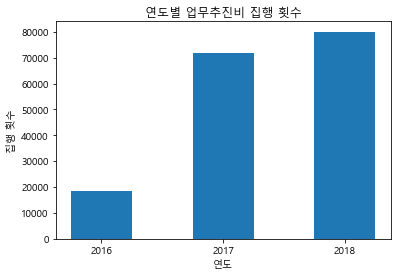

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

plt.bar(year_expense.index, year_expense.values, tick_label =year_expense.index, width = 0.5)
plt.title("연도별 업무추진비 집행 횟수")
plt.xlabel("연도")
plt.ylabel("집행 횟수")
plt.show()

**[16장: 579페이지]**

In [48]:
import pandas as pd

year_total = pd.pivot_table(df_expense_all, index = ['집행연도'], values=['집행금액'], aggfunc = sum)
year_total

,집행금액
집행연도,
2016,2831458776
2017,9321898802
2018,11412902493


**[16장: 580페이지]**

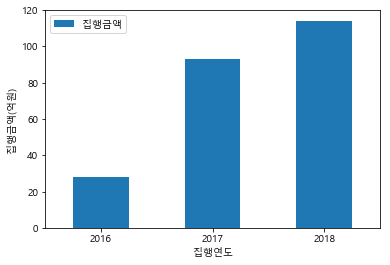

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

eok_won = 100000000 # 억원
(year_total/eok_won).plot.bar(rot=0) # 'rot = 각도'로 xtick 회전 각도를 지정
plt.ylabel('집행금액(억원)')
plt.show()

#### 월별 집행금액 분석

**[16장: 581페이지]** 

In [53]:
month_total = pd.pivot_table(df_expense_all, index = ['집행월'], values=['집행금액'], 
                             aggfunc = sum)
month_total

,집행금액
집행월,
1,1639833832
2,1909735249
3,1650488411
4,1440145053
5,1431381779
6,1618346046
7,1615793367
8,1683522857
9,2048570048


**[16장: 581페이지]** 

In [51]:
year_month_total = pd.pivot_table(df_expense_all, index = ['집행월'], columns=['집행연도'], 
                                  values=['집행금액'], aggfunc = sum)
year_month_total

집행금액                        
집행연도        2016        2017        2018
집행월                                     
1       47693520   729315320   862824992
2      109610290   714656124  1085468835
3       61903760   747255654   841328997
4       65546910   644248075   730350068
5       66231770   672787918   692362091
6       67448430   780348992   770548624
7       67205920   723022406   825565041
8       56708405   679507220   947307232
9      109465580   858946825  1080157643
10      61921802   652470333   998194689
11     800376504   862637491  1016097585
12    1317345885  1256702444  1562696696

**[16장: 582페이지]** 

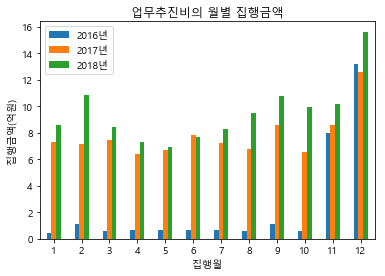

In [54]:
eok_won = 100000000 # 억원

(year_month_total/eok_won).plot.bar(rot=0)
plt.ylabel('집행금액(억원)')
plt.title("업무추진비의 월별 집행금액")
plt.legend(['2016년', '2017년', '2018년'])
plt.show()

#### 부서별 집행 내역 분석

**[16장: 583페이지]** 

In [55]:
dept_level1_total = pd.pivot_table(df_expense_all, index = ['부서레벨1'], values=['집행금액'], 
                                   aggfunc = sum)
dept_level1_total

,집행금액
부서레벨1,
사업소,4872437880
서울시본청,13967177416
소방재난본부(소방서),3859671439
의회사무처,866973336


**[16장: 584페이지]** 

In [57]:
dept_level_2_total = pd.pivot_table(df_expense_all, index = ['부서레벨2'], values=['집행금액'], 
                                    aggfunc = sum)
dept_level_2_total.head()

,집행금액
부서레벨2,
119특수구조단,116393420
감사위원회,267321930
강남소방서,169136740
강동소방서,166212200
강북소방서,122324520


**[16장: 584페이지]** 

In [59]:
dept_level_2_total_top10 = dept_level_2_total.sort_values(by=['집행금액'], ascending = False)[0:10]
dept_level_2_total_top10

,집행금액
부서레벨2,
상수도사업본부,1634715435
서울특별시장,1435327244
행정국,1388232944
기획조정실,1095362000
시민소통기획관,728381084
정무부시장,662177340
행정1부시장,645968310
안전총괄본부,561458697
행정2부시장,542814902


**[16장: 585페이지]** 

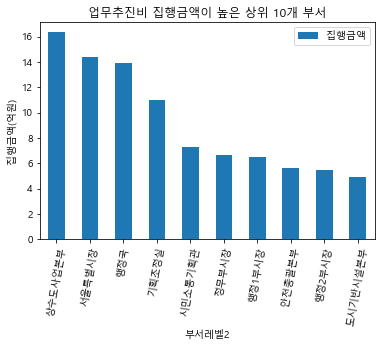

In [60]:
eok_won = 100000000 # 억원

(dept_level_2_total_top10/eok_won).plot.bar(rot=80)
plt.ylabel('집행금액(억원)')
plt.title("업무추진비 집행금액이 높은 상위 10개 부서")
plt.show()

**[16장: 585 ~ 586페이지]** 

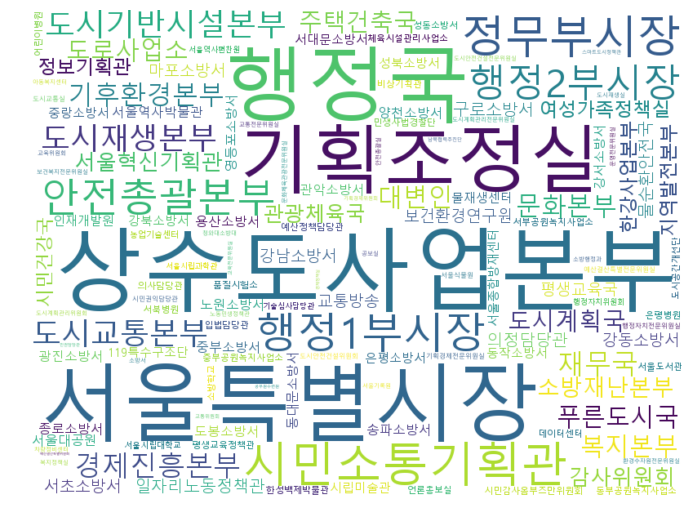

In [61]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

korean_font_path = 'C:/Windows/Fonts/malgun.ttf' # 한글 폰트(맑은 고딕) 파일명

# 워드 클라우드 이미지 생성
wc = WordCloud(font_path=korean_font_path, background_color='white',
              width=800, height=600)

frequencies = dept_level_2_total['집행금액'] # pandas의 Series 형식이 됨
wordcloud_image = wc.generate_from_frequencies(frequencies)

plt.figure(figsize=(12,9))
plt.axis('off')
plt.imshow(wordcloud_image, interpolation = 'bilinear')
plt.show()

#### 요일별 및 시간대별 집행 내역 분석

**[16장: 586페이지]** 

In [62]:
df_expense_all['집행일시'].values

array(['2016-01-30 12:27', '2016-01-30 08:28', '2016-01-29 20:06', ...,
       '2018-12-11 18:00', '2018-12-11 14:24', '2018-12-11 14:18'],
      dtype=object)

**[16장: 587페이지]** 

In [63]:
expense_date_time = pd.to_datetime(df_expense_all['집행일시'])
expense_date_time.values

array(['2016-01-30T12:27:00.000000000', '2016-01-30T08:28:00.000000000',
       '2016-01-29T20:06:00.000000000', ...,
       '2018-12-11T18:00:00.000000000', '2018-12-11T14:24:00.000000000',
       '2018-12-11T14:18:00.000000000'], dtype='datetime64[ns]')

**[16장: 587페이지]**  

In [64]:
week_day_name = ["월", "화", "수", "목", "금", "토", "일"]

df_expense_all['집행일시_요일'] = [week_day_name[weekday] for weekday in expense_date_time.dt.weekday]

**[16장: 587페이지]**  

In [65]:
df_expense_all['집행일시_시간'] = [hour for hour in expense_date_time.dt.hour]

**[16장: 587페이지]**  

In [66]:
df_expense_all.head(3)

,제목,부서레벨1,부서레벨2,집행연도,집행월,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액,집행일시_요일,집행일시_시간
0,2016년 1월 서울특별시장 업무추진비 집행내역 공표,서울시본청,서울특별시장,2016,1,행정국 총무과,2016-01-30 12:27,매일한우타운식당(광시면 예당로길),시정 청년정책 관련 업무협의 간담회,시장 등 12명,카드,250000,토,12
1,2016년 1월 서울특별시장 업무추진비 집행내역 공표,서울시본청,서울특별시장,2016,1,행정국 총무과,2016-01-30 08:28,청암회관(예산군 덕산면),"시정 충남, 전북 현장 방문 관련 업무협의",시장 등 6명,카드,72000,토,8
2,2016년 1월 서울특별시장 업무추진비 집행내역 공표,서울시본청,서울특별시장,2016,1,행정국 총무과,2016-01-29 20:06,태원(서구 문정로),시정 지방자치단체 협력 관련 업무협의,시장 등 3명,카드,107500,금,20


**[16장: 588페이지]**  

In [67]:
expense_weekday = df_expense_all['집행일시_요일'].value_counts()
expense_weekday

목    36376
화    33746
수    33170
금    32471
월    30303
토     2291
일     1621
Name: 집행일시_요일, dtype: int64

**[16장: 588페이지]**  

In [68]:
expense_weekday = expense_weekday.reindex(index = week_day_name)
expense_weekday

월    30303
화    33746
수    33170
목    36376
금    32471
토     2291
일     1621
Name: 집행일시_요일, dtype: int64

**[16장: 589페이지]**  

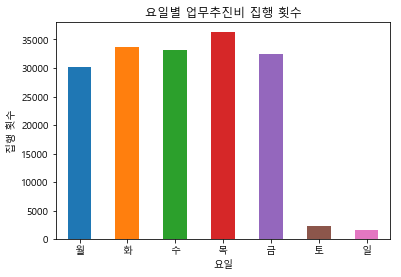

In [216]:
expense_weekday.plot.bar(rot=0)
plt.title("요일별 업무추진비 집행 횟수")
plt.xlabel("요일")
plt.ylabel("집행 횟수")
plt.show()

**[16장: 589페이지]**  

In [125]:
expense_hour_num = df_expense_all['집행일시_시간'].value_counts()
expense_hour_num

12    65871
20    18528
13    16812
19    13596
21     9981
14     6566
11     6503
15     5827
18     4714
10     4406
0      4322
16     4078
9      2733
17     2505
22     2125
8       777
7       399
23       96
6        40
1        26
4        23
3        20
5        16
2        14
Name: 집행일시_시간, dtype: int64

**[16장: 590페이지]**  

In [126]:
work_hour = [ (k+8)%24 for k in range(24)]
expense_hour_num = expense_hour_num.reindex(index = work_hour)
expense_hour_num

8       777
9      2733
10     4406
11     6503
12    65871
13    16812
14     6566
15     5827
16     4078
17     2505
18     4714
19    13596
20    18528
21     9981
22     2125
23       96
0      4322
1        26
2        14
3        20
4        23
5        16
6        40
7       399
Name: 집행일시_시간, dtype: int64

**[16장: 591페이지]** 

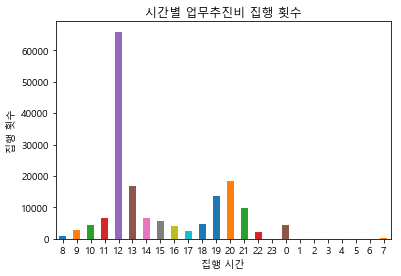

In [79]:
expense_hour_num.plot.bar(rot = 0)
plt.title("시간별 업무추진비 집행 횟수")
plt.xlabel("집행 시간")
plt.ylabel("집행 횟수")
plt.show()

**[16장: 592페이지]** 

In [80]:
expense_hour_total = pd.pivot_table(df_expense_all, index = ['집행일시_시간'],
                                    values=['집행금액'], aggfunc = sum)
expense_hour_total.head()

,집행금액
집행일시_시간,
0,780153340
1,3215355
2,1664989
3,6173272
4,6027401


**[16장: 592페이지]** 

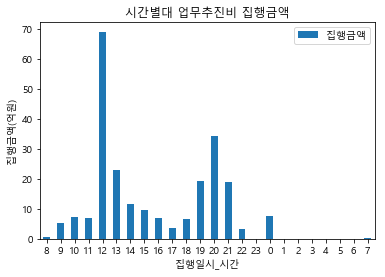

In [81]:
eok_won = 100000000 # 억원
expense_hour_total = expense_hour_total.reindex(index = work_hour)

(expense_hour_total/eok_won).plot.bar(rot=0)
plt.ylabel('집행금액(억원)')
plt.title("시간별대 업무추진비 집행금액")
plt.show()

## 16.4 정리